In [60]:

import numpy as np
from keras.models import Model
from keras.layers import Input, Dense, Lambda
from keras.optimizers import Adam
from keras import backend as K


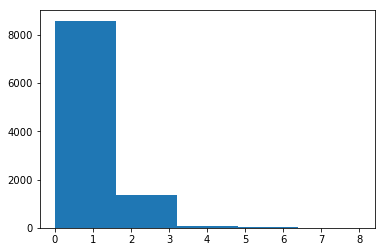

In [62]:
# generating data
w0 = -3
w1 = .001
n = 10000
age = np.random.randint(18, 56, size=n)
n_weeks = np.random.randint(1, 24, size=n)
lambda_ = np.exp(w0 + w1*age)
lambda_n_weeks = n_weeks*lambda_
y = np.random.poisson(lam=lambda_n_weeks)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(y, 5)
plt.show()


In [63]:

inputs = Input(name='input1', shape=(1,))
hidden = Dense(5, activation='relu')(inputs)
outputs = Dense(1, activation=Lambda(lambda x: K.exp(x)))(hidden)
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='poisson',optimizer=Adam(lr=.008))
model = model.fit([age], y, batch_size=1000, nb_epoch=30, validation_split=0.1, sample_weight = n_weeks)


/home/mihaela/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 9000 samples, validate on 1000 samples
Epoch 1/30
9000/9000 [==============================] - 0s - loss: 50.4400 - val_loss: 14.2765
Epoch 2/30
9000/9000 [==============================] - 0s - loss: 18.0154 - val_loss: 21.9042
Epoch 3/30
9000/9000 [==============================] - 0s - loss: 21.6902 - val_loss: 21.5823
Epoch 4/30
9000/9000 [==============================] - 0s - loss: 19.4095 - val_loss: 17.3752
Epoch 5/30
9000/9000 [==============================] - 0s - loss: 15.0666 - val_loss: 13.1460
Epoch 6/30
9000/9000 [==============================] - 0s - loss: 12.1674 - val_loss: 11.7319
Epoch 7/30
9000/9000 [==============================] - 0s - l